# [Analysis Correlation]

Scratchpad for correlation analysis

# Setup

## Library import
We import all the required Python libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os,sys
import joblib
from os import path

# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Common things
# from sklearn.metrics import classification_report
# from scipy import stats

# Visualizations
# import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("white") # darkgrid, whitegrid, dark, white, and ticks
# plt.figure(figsize=(7, 7))

# Autoreload extension
# if 'autoreload' not in get_ipython().extension_manager.loaded:
#     %load_ext autoreload
    
# %autoreload 2

In [3]:
# Examples seaborn
# with sns.axes_style("whitegrid"):
#     fig, axis = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
#     fig.suptitle(f'Position distribution on splits')
#     sns.boxplot(ax=axis[0], data=df_prep, y='event', x='ith_pos', order=event_label_map.values())
#     sns.boxplot(ax=axis[1], data=pd.read_pickle(path.join(DATA_PATH, "stage2_test.pkl") ), y='event', x='ith_pos', order=event_label_map.values())

## Local library import
We import all the required local libraries libraries

In [4]:
# Include local library paths
import sys
# sys.path.append('path/to/local/lib') # uncomment and fill to import local libraries
# add project folders so local libraries can be imported
sys.path.insert(1, os.path.join(os.getcwd()  , '..'))
sys.path.insert(1, os.path.join(os.getcwd()  , '../src'))

# Import local libraries
# from plibs.utils import corrstats
# from src.plibs.utils import plots as myplots

In [5]:
# notebook misc functions
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def displayAll(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):	
        display(df)  

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

In [12]:
def load_ds(fpath) -> pd.DataFrame:
    df = pd.read_csv(fpath, sep='\t', index_col=[0])
    print(df.shape)
    display(df.head())
    return df


# Data import
We retrieve all the required data for the analysis.

In [13]:
ds_detection = load_ds("../data/data/detection_dataset/20231030_145712_databricks-dolly_size-1000_melted_stats.tsv")

(8000, 35)


,instruction,context,category,data_id,model,response,id,readability_flesch_kincaid_score,readability_flesch_score,readability_gunning_fog_score,readability_coleman_liau_score,readability_dale_chall_score,readability_ari_score,readability_linsear_write_score,stats_avg_word_length,stats_avg_sentence_length,stats_avg_words_per_sentence,stats_percent_vowels,stats_percent_consonants,stats_percent_punctuation,stats_percent_stopwords,stats_num_words,stats_num_sentences,stats_percent_unique_words,stats_percent_long_words,spacy_percent_nouns,spacy_percent_verbs,spacy_percent_adjectives,detector_radar_vicuna_7B_label,detector_radar_vicuna_7B_human_confidence_score,detector_radar_vicuna_7B_ai_confidence_score,detector_chatgpt_qa_detector_score,detector_chatgpt_qa_detector_label,detector_xlmr_chatgptdetect_noisy_score,detector_xlmr_chatgptdetect_noisy_label
0,What are the best selling albums of all time? ...,NaN,brainstorming,81fd19bd675d4e048a2f308d53a0bf44,human,Best selling albums of all time:\n\n- Michael ...,dc30b6dce21c49cdbb36b17d95cc4e4e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.534483,378.0,58.0,0.267196,0.338624,0.068783,0.103448,58.0,1.0,0.896552,0.206897,0.043011,0.021505,0.032258,AI-generated,0.374648,0.625352,0.999768,LABEL_0,0.962242,HUMAN
1,"Given this paragraph about magnesium, what is ...",Elemental magnesium is a gray-white lightweigh...,closed_qa,d8b6f490829241e5a4a25140aafeda36,human,The melting point of magnesium is 650 °C.,72dac16b8c4b423e82cd048f02edd471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.250000,20.0,4.5,0.268293,0.390244,0.024390,0.250000,8.0,2.0,1.000000,0.125000,0.400000,0.000000,0.000000,AI-generated,0.002299,0.997701,0.989739,LABEL_0,0.999998,HUMAN
2,How do I pick the best bananas?,NaN,general_qa,c95dc390011b427ebd791458d33807fb,human,It depends on when you want to eat them. If yo...,967e78499907437bafc05727d21c81a0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.875000,53.6,12.0,0.305147,0.448529,0.025735,0.464286,56.0,5.0,0.714286,0.053571,0.095238,0.142857,0.095238,AI-generated,0.005447,0.994553,0.996650,LABEL_0,0.999998,HUMAN
3,Extract the teams that Bob Sanders played thro...,"Demond ""Bob"" Sanders (born February 24, 1981) ...",information_extraction,be55b8cc108f437296914a6a7bbe4565,human,"Iowa Hawkeyes, Indianapolis Colts, San Diego C...",5b6736d2c197455b8f55f08c865dc8d3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.714286,53.0,7.0,0.320755,0.396226,0.037736,0.000000,7.0,1.0,1.000000,0.428571,0.000000,0.000000,0.000000,AI-generated,0.000849,0.999151,0.994716,LABEL_0,0.990737,HUMAN
4,Who was the 27th president of the United State...,NaN,open_qa,ce1bc1c0a9ef48e0856fcdd32fca3893,human,William Howard Taft was the 27th president of ...,c244a96767444e87a1024c7669e7bc0e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.533333,40.5,8.0,0.231707,0.402439,0.012195,0.400000,15.0,2.0,0.933333,0.066667,0.062500,0.000000,0.062500,AI-generated,0.001472,0.998528,0.975979,LABEL_0,0.999958,CHATGPT


In [26]:
ds_watti = load_ds("../out/merged_fmt.tsv")

# assign top1 label for each 
for atti in ["emotion_", "irony_", "convincingness_"]:
    ds_watti[f"{atti}top1_label"] = ds_watti[[c for c in ds_watti.columns if (atti in c and not c.endswith("top1_label"))]].idxmax(axis=1)
    ds_watti[f"{atti}top1_score"] = ds_watti[[c for c in ds_watti.columns if (atti in c and not c.endswith("top1_label"))]].max(axis=1)
    ds_watti[f"{atti}top1_label"] = ds_watti[f"{atti}top1_label"].apply(lambda v: v[v.find("_")+1:])

display(ds_watti.head())


(8000, 32)


,emotion_admiration,emotion_amusement,emotion_anger,emotion_annoyance,emotion_approval,emotion_caring,emotion_confusion,emotion_curiosity,emotion_desire,emotion_disappointment,emotion_disapproval,emotion_disgust,emotion_embarrassment,emotion_excitement,emotion_fear,emotion_gratitude,emotion_grief,emotion_joy,emotion_love,emotion_nervousness,emotion_optimism,emotion_pride,emotion_realization,emotion_relief,emotion_remorse,emotion_sadness,emotion_surprise,emotion_neutral,irony_non_irony,irony_irony,convincingness_convincing,convincingness_non_convincing
0,0.002117,0.000175,0.000084,0.000299,0.002078,0.000040,0.000109,0.000109,0.000070,0.000221,0.000150,0.000125,0.000050,0.000631,0.000080,0.000085,0.000027,0.000487,0.000192,0.000023,0.000128,0.000086,0.000670,0.000050,0.000017,0.000102,0.000178,0.991616,0.970296,0.029704,0.857564,0.142436
1,0.000200,0.000080,0.000066,0.000281,0.001549,0.000030,0.000214,0.000133,0.000049,0.000130,0.000194,0.000125,0.000028,0.000081,0.000058,0.000027,0.000013,0.000055,0.000074,0.000015,0.000107,0.000012,0.000593,0.000014,0.000012,0.000070,0.000054,0.995735,0.692633,0.307367,0.990467,0.009533
2,0.000224,0.000091,0.000096,0.000579,0.011549,0.001316,0.001621,0.000781,0.000486,0.000239,0.000626,0.000106,0.000024,0.000103,0.000080,0.000076,0.000031,0.000124,0.000305,0.000054,0.002143,0.000029,0.002350,0.000079,0.000048,0.000108,0.000061,0.976671,0.978583,0.021417,0.945379,0.054621
3,0.000112,0.000060,0.000068,0.000228,0.000389,0.000028,0.000106,0.000059,0.000040,0.000138,0.000143,0.000088,0.000029,0.000062,0.000049,0.000040,0.000016,0.000045,0.000036,0.000011,0.000071,0.000011,0.000221,0.000011,0.000015,0.000085,0.000037,0.997799,0.954622,0.045378,0.837508,0.162492
4,0.001270,0.000305,0.000127,0.000908,0.008481,0.000162,0.000388,0.000160,0.000194,0.001378,0.000829,0.000253,0.000166,0.000135,0.000088,0.000534,0.000111,0.000311,0.000119,0.000065,0.000971,0.000152,0.012068,0.000246,0.000190,0.000794,0.000141,0.969454,0.362594,0.637405,0.984692,0.015308


,emotion_admiration,emotion_amusement,emotion_anger,emotion_annoyance,emotion_approval,emotion_caring,emotion_confusion,emotion_curiosity,emotion_desire,emotion_disappointment,emotion_disapproval,emotion_disgust,emotion_embarrassment,emotion_excitement,emotion_fear,emotion_gratitude,emotion_grief,emotion_joy,emotion_love,emotion_nervousness,emotion_optimism,emotion_pride,emotion_realization,emotion_relief,emotion_remorse,emotion_sadness,emotion_surprise,emotion_neutral,irony_non_irony,irony_irony,convincingness_convincing,convincingness_non_convincing,emotion_top1_label,emotion_top1_score,irony_top1_label,irony_top1_score,convincingness_top1_label,convincingness_top1_score
0,0.002117,0.000175,0.000084,0.000299,0.002078,0.000040,0.000109,0.000109,0.000070,0.000221,0.000150,0.000125,0.000050,0.000631,0.000080,0.000085,0.000027,0.000487,0.000192,0.000023,0.000128,0.000086,0.000670,0.000050,0.000017,0.000102,0.000178,0.991616,0.970296,0.029704,0.857564,0.142436,neutral,0.991616,non_irony,0.970296,convincing,0.857564
1,0.000200,0.000080,0.000066,0.000281,0.001549,0.000030,0.000214,0.000133,0.000049,0.000130,0.000194,0.000125,0.000028,0.000081,0.000058,0.000027,0.000013,0.000055,0.000074,0.000015,0.000107,0.000012,0.000593,0.000014,0.000012,0.000070,0.000054,0.995735,0.692633,0.307367,0.990467,0.009533,neutral,0.995735,non_irony,0.692633,convincing,0.990467
2,0.000224,0.000091,0.000096,0.000579,0.011549,0.001316,0.001621,0.000781,0.000486,0.000239,0.000626,0.000106,0.000024,0.000103,0.000080,0.000076,0.000031,0.000124,0.000305,0.000054,0.002143,0.000029,0.002350,0.000079,0.000048,0.000108,0.000061,0.976671,0.978583,0.021417,0.945379,0.054621,neutral,0.976671,non_irony,0.978583,convincing,0.945379
3,0.000112,0.000060,0.000068,0.000228,0.000389,0.000028,0.000106,0.000059,0.000040,0.000138,0.000143,0.000088,0.000029,0.000062,0.000049,0.000040,0.000016,0.000045,0.000036,0.000011,0.000071,0.000011,0.000221,0.000011,0.000015,0.000085,0.000037,0.997799,0.954622,0.045378,0.837508,0.162492,neutral,0.997799,non_irony,0.954622,convincing,0.837508
4,0.001270,0.000305,0.000127,0.000908,0.008481,0.000162,0.000388,0.000160,0.000194,0.001378,0.000829,0.000253,0.000166,0.000135,0.000088,0.000534,0.000111,0.000311,0.000119,0.000065,0.000971,0.000152,0.012068,0.000246,0.000190,0.000794,0.000141,0.969454,0.362594,0.637405,0.984692,0.015308,neutral,0.969454,irony,0.637405,convincing,0.984692


In [27]:
ds_fat = pd.concat([ds_detection, ds_watti], axis=1)
print(ds_fat.shape)
ds_fat.head()

(8000, 73)


,instruction,context,category,data_id,model,response,id,readability_flesch_kincaid_score,readability_flesch_score,readability_gunning_fog_score,readability_coleman_liau_score,readability_dale_chall_score,readability_ari_score,readability_linsear_write_score,stats_avg_word_length,stats_avg_sentence_length,stats_avg_words_per_sentence,stats_percent_vowels,stats_percent_consonants,stats_percent_punctuation,stats_percent_stopwords,stats_num_words,stats_num_sentences,stats_percent_unique_words,stats_percent_long_words,...,emotion_excitement,emotion_fear,emotion_gratitude,emotion_grief,emotion_joy,emotion_love,emotion_nervousness,emotion_optimism,emotion_pride,emotion_realization,emotion_relief,emotion_remorse,emotion_sadness,emotion_surprise,emotion_neutral,irony_non_irony,irony_irony,convincingness_convincing,convincingness_non_convincing,emotion_top1_label,emotion_top1_score,irony_top1_label,irony_top1_score,convincingness_top1_label,convincingness_top1_score
0,What are the best selling albums of all time? ...,NaN,brainstorming,81fd19bd675d4e048a2f308d53a0bf44,human,Best selling albums of all time:\n\n- Michael ...,dc30b6dce21c49cdbb36b17d95cc4e4e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.534483,378.0,58.0,0.267196,0.338624,0.068783,0.103448,58.0,1.0,0.896552,0.206897,...,0.000631,0.000080,0.000085,0.000027,0.000487,0.000192,0.000023,0.000128,0.000086,0.000670,0.000050,0.000017,0.000102,0.000178,0.991616,0.970296,0.029704,0.857564,0.142436,neutral,0.991616,non_irony,0.970296,convincing,0.857564
1,"Given this paragraph about magnesium, what is ...",Elemental magnesium is a gray-white lightweigh...,closed_qa,d8b6f490829241e5a4a25140aafeda36,human,The melting point of magnesium is 650 °C.,72dac16b8c4b423e82cd048f02edd471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.250000,20.0,4.5,0.268293,0.390244,0.024390,0.250000,8.0,2.0,1.000000,0.125000,...,0.000081,0.000058,0.000027,0.000013,0.000055,0.000074,0.000015,0.000107,0.000012,0.000593,0.000014,0.000012,0.000070,0.000054,0.995735,0.692633,0.307367,0.990467,0.009533,neutral,0.995735,non_irony,0.692633,convincing,0.990467
2,How do I pick the best bananas?,NaN,general_qa,c95dc390011b427ebd791458d33807fb,human,It depends on when you want to eat them. If yo...,967e78499907437bafc05727d21c81a0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.875000,53.6,12.0,0.305147,0.448529,0.025735,0.464286,56.0,5.0,0.714286,0.053571,...,0.000103,0.000080,0.000076,0.000031,0.000124,0.000305,0.000054,0.002143,0.000029,0.002350,0.000079,0.000048,0.000108,0.000061,0.976671,0.978583,0.021417,0.945379,0.054621,neutral,0.976671,non_irony,0.978583,convincing,0.945379
3,Extract the teams that Bob Sanders played thro...,"Demond ""Bob"" Sanders (born February 24, 1981) ...",information_extraction,be55b8cc108f437296914a6a7bbe4565,human,"Iowa Hawkeyes, Indianapolis Colts, San Diego C...",5b6736d2c197455b8f55f08c865dc8d3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.714286,53.0,7.0,0.320755,0.396226,0.037736,0.000000,7.0,1.0,1.000000,0.428571,...,0.000062,0.000049,0.000040,0.000016,0.000045,0.000036,0.000011,0.000071,0.000011,0.000221,0.000011,0.000015,0.000085,0.000037,0.997799,0.954622,0.045378,0.837508,0.162492,neutral,0.997799,non_irony,0.954622,convincing,0.837508
4,Who was the 27th president of the United State...,NaN,open_qa,ce1bc1c0a9ef48e0856fcdd32fca3893,human,William Howard Taft was the 27th president of ...,c244a96767444e87a1024c7669e7bc0e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.533333,40.5,8.0,0.231707,0.402439,0.012195,0.400000,15.0,2.0,0.933333,0.066667,...,0.000135,0.000088,0.000534,0.000111,0.000311,0.000119,0.000065,0.000971,0.000152,0.012068,0.000246,0.000190,0.000794,0.000141,0.969454,0.362594,0.637405,0.984692,0.015308,neutral,0.969454,irony,0.637405,convincing,0.984692


In [19]:
ds_eval = load_ds("../out/detectors_evaluation_metrics.tsv")

(651, 27)


,detector,group,accuracy,recall,f1,roc_auc_ovr,tn,fp,fn,tp,tpr,tnr,fpr,fnr,samples,support,precision,error_rate,khat,mcc,csi,gmean,balac,posLr,negLr,dor,bmi
0,radar_vicuna_7B_label,NaN,0.835625,0.119000,0.153252,0.528500,6566,434,881,119,0.119000,0.938000,0.062000,0.881000,8000,1000,0.215190,0.164375,0.070507,0.074314,0.016716,1.028105,0.528500,1.919355,0.939232,2.043536,0.057000
1,radar_vicuna_7B_label,category:brainstorming,0.814076,0.100840,0.119403,0.508403,763,70,107,12,0.100840,0.915966,0.084034,0.899160,952,119,0.146341,0.185924,0.019391,0.019811,0.014201,1.008368,0.508403,1.200000,0.981651,1.222430,0.016807
2,radar_vicuna_7B_label,category:brainstorming|emotion_top1_label:neutral,0.794080,0.095238,0.111111,0.499256,607,65,95,10,0.095238,0.903274,0.096726,0.904762,777,105,0.133333,0.205920,-0.001692,-0.001723,0.014663,0.999256,0.499256,0.984615,1.001647,0.982996,-0.001488
3,radar_vicuna_7B_label,category:brainstorming|emotion_top1_label:admi...,0.860465,0.000000,0.000000,0.462500,37,3,3,0,0.000000,0.925000,0.075000,1.000000,43,3,0.000000,0.139535,-0.075000,-0.075000,0.000000,0.961769,0.462500,0.000000,1.081081,0.000000,-0.075000
4,radar_vicuna_7B_label,category:brainstorming|emotion_top1_label:appr...,0.939394,0.000000,0.000000,0.484375,31,1,1,0,0.000000,0.968750,0.031250,1.000000,33,1,0.000000,0.060606,-0.031250,-0.031250,0.000000,0.984251,0.484375,0.000000,1.032258,0.000000,-0.031250


# Correlations

Compute correlations

## Categorical corrs

In [33]:
# sub df with only categorical vars
_vars1 = ["model"] + [c for c in ds_fat.columns if c.startswith("detector_") and c.endswith("_label")]
print(_vars1)
_vars2 = [c for c in ds_fat.columns if not c.startswith("detector_") and c.endswith("_label")]
print(_vars2)
_vars = ["category"] + _vars1 + _vars2
ds_fat[_vars].head()

['model', 'detector_radar_vicuna_7B_label', 'detector_chatgpt_qa_detector_label', 'detector_xlmr_chatgptdetect_noisy_label']
['emotion_top1_label', 'irony_top1_label', 'convincingness_top1_label']


,category,model,detector_radar_vicuna_7B_label,detector_chatgpt_qa_detector_label,detector_xlmr_chatgptdetect_noisy_label,emotion_top1_label,irony_top1_label,convincingness_top1_label
0,brainstorming,human,AI-generated,LABEL_0,HUMAN,neutral,non_irony,convincing
1,closed_qa,human,AI-generated,LABEL_0,HUMAN,neutral,non_irony,convincing
2,general_qa,human,AI-generated,LABEL_0,HUMAN,neutral,non_irony,convincing
3,information_extraction,human,AI-generated,LABEL_0,HUMAN,neutral,non_irony,convincing
4,open_qa,human,AI-generated,LABEL_0,CHATGPT,neutral,irony,convincing


In [34]:
from itertools import product
list(product(_vars1,_vars2, repeat = 1))

[('model', 'emotion_top1_label'),
 ('model', 'irony_top1_label'),
 ('model', 'convincingness_top1_label'),
 ('detector_radar_vicuna_7B_label', 'emotion_top1_label'),
 ('detector_radar_vicuna_7B_label', 'irony_top1_label'),
 ('detector_radar_vicuna_7B_label', 'convincingness_top1_label'),
 ('detector_chatgpt_qa_detector_label', 'emotion_top1_label'),
 ('detector_chatgpt_qa_detector_label', 'irony_top1_label'),
 ('detector_chatgpt_qa_detector_label', 'convincingness_top1_label'),
 ('detector_xlmr_chatgptdetect_noisy_label', 'emotion_top1_label'),
 ('detector_xlmr_chatgptdetect_noisy_label', 'irony_top1_label'),
 ('detector_xlmr_chatgptdetect_noisy_label', 'convincingness_top1_label')]

In [39]:
# stats.chi2_contingency(pd.crosstab(ds_fat['model'], ds_fat['emotion_top1_label']))

In [35]:
from scipy import stats

In [42]:
def compute_chi_test(df, vars1, vars2):
    rs = []
    for i in list(product(_vars1,_vars2, repeat = 1)):
        if i[0] != i[1]:
            rs.append((i[0],i[1],
                           list(stats.chi2_contingency(pd.crosstab(df[i[0]], df[i[1]])))[1]))
            
    rs = pd.DataFrame(rs, columns = ['var1', 'var2','coeff'])
    rs = rs.pivot(index='var1', columns='var2', values='coeff') # -> into a crosstab
    return rs

rs = compute_chi_test(ds_fat[["category"] + _vars1 + _vars2], _vars1, _vars2)
rs

var2,convincingness_top1_label,emotion_top1_label,irony_top1_label
var1,,,
detector_chatgpt_qa_detector_label,2.632736e-40,6.118855e-39,1.512782e-16
detector_radar_vicuna_7B_label,1.835318e-03,4.588197e-02,2.179107e-02
detector_xlmr_chatgptdetect_noisy_label,6.694365e-90,9.344882e-35,4.571451e-01
model,1.565369e-20,3.075275e-82,2.696635e-24


In [100]:
from matplotlib import colors
import math

### General corss

In [181]:
def plot_correlation_matrix(df_corrs, significance_level=0.05, fig=None, cbar=True) -> plt.Figure:    
    tmp = np.ma.masked_where(df_corrs>significance_level, df_corrs)
    if not fig:
        fig = plt.figure(figsize=(10, 8))
    g = sns.heatmap(df_corrs, cmap='viridis', annot=True, cbar=cbar )
    sns.heatmap(rs, cmap=colors.ListedColormap(['lightgray']), mask=(tmp>significance_level), cbar=False, annot=True )
    plt.subplots_adjust(left=0.2)#, hspace=0.1)
    # plt.savefig("../out/figs/correlations_categorical.png")
    # plt.show()
    return fig

# plot_correlation_matrix(rs, significance_level=0.03)
# plt.show()

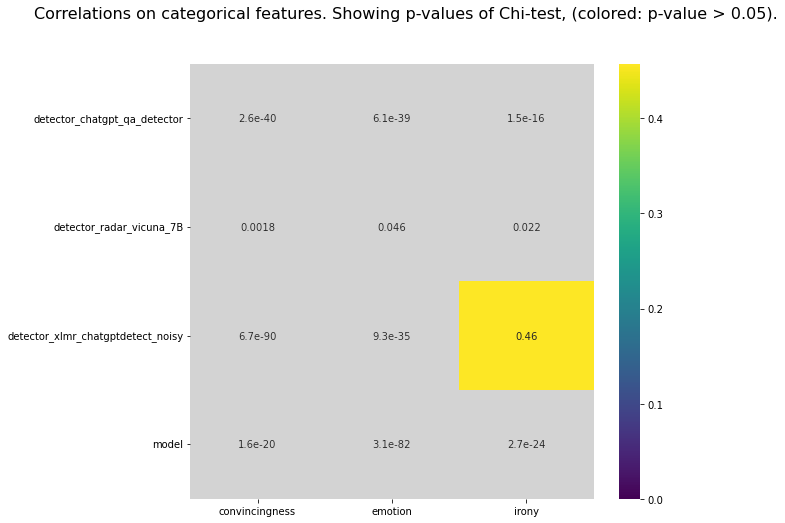

In [183]:
_alpha = 0.05
rs = compute_chi_test(ds_fat[["category"] + _vars1 + _vars2], _vars1, _vars2)
fig = plot_correlation_matrix(rs, significance_level=_alpha)
ax = fig.get_axes()[0]
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticklabels([lab.get_text().replace("_top1_label", "") for lab in ax.get_xticklabels()])
ax.set_yticklabels([lab.get_text().replace("_label", "") for lab in ax.get_yticklabels()])
fig.suptitle(f"Correlations on categorical features. Showing p-values of Chi-test, (colored: p-value > {_alpha}).", fontsize=16)
plt.show()

### Corrs by task

Text(0.5, 0.98, 'Correlations on categorical features by task. Showing p-values of Chi-test, (colored: p-value > 0.05).')

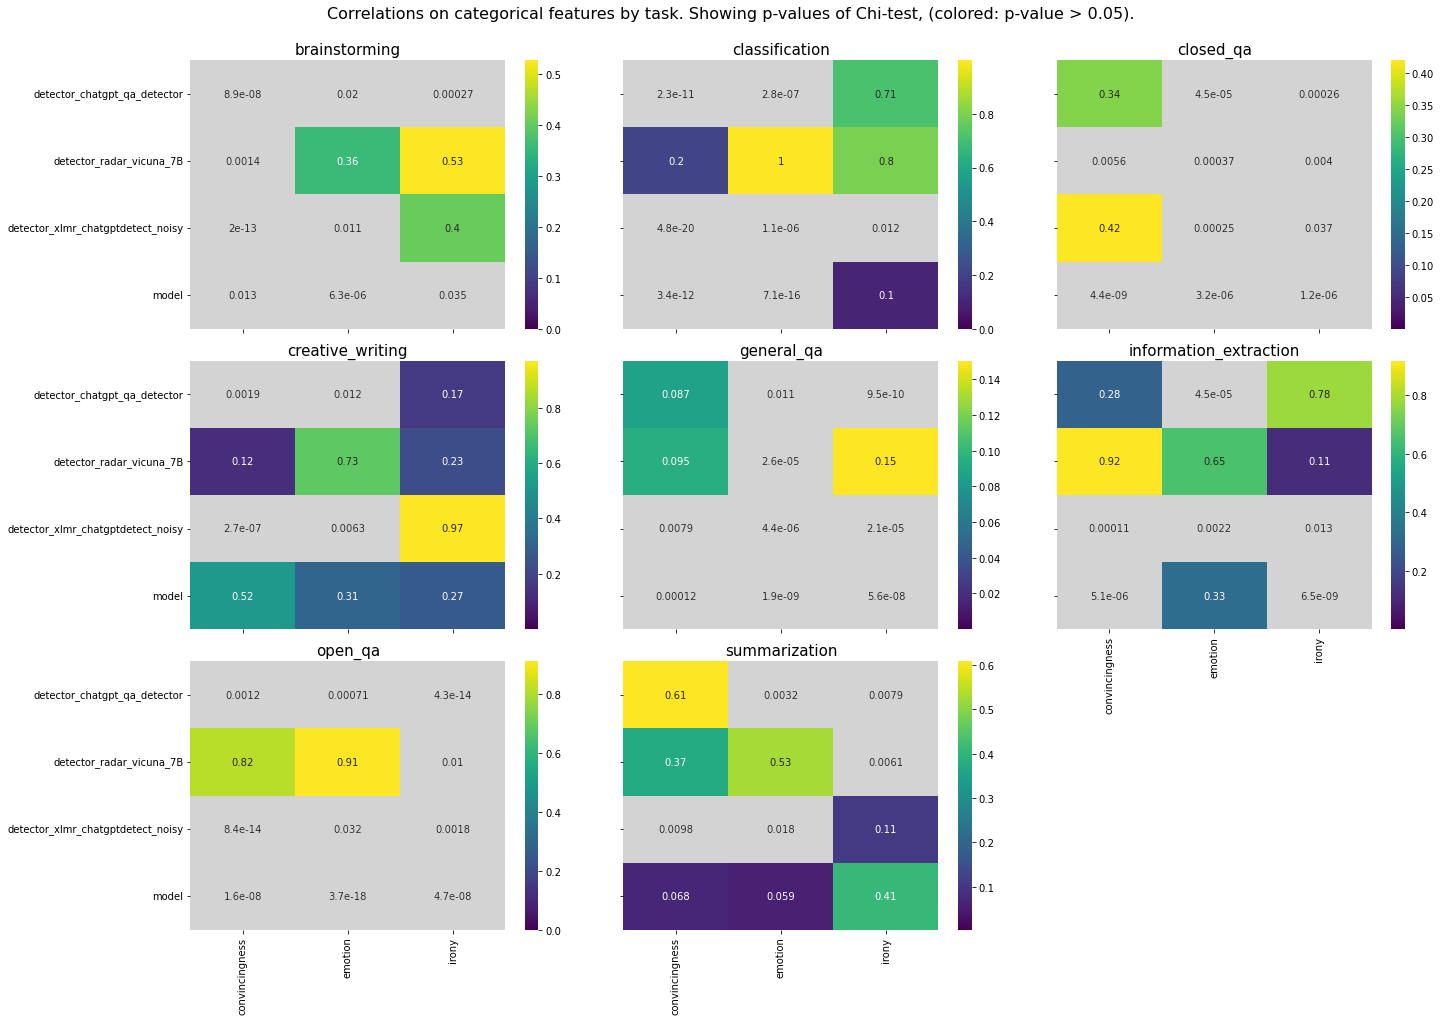

In [184]:
_alpha = 0.05
dftmp = ds_fat[~ds_fat.category.isna()]
n_figs=len(dftmp.category.unique())
n_cols=3
fig = plt.figure(figsize=(25, 15))
gs = plt.GridSpec(nrows=math.ceil(n_figs/n_cols), ncols=n_cols, width_ratios=[1]*n_cols, wspace=0.1, hspace=0.12)

for i, (grpk, grp_df) in enumerate(ds_fat.groupby(["category"])):
    rs = compute_chi_test(grp_df[_vars1 + _vars2], _vars1, _vars2)
    # display(rs)
    ax = fig.add_subplot(gs[int(i/n_cols), (i%n_cols)])
    plot_correlation_matrix(rs, significance_level=_alpha, fig=fig)#, cbar=(i%n_cols)) #only leave last column cbar
    ax.set_title(grpk, fontsize=15)    
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels([lab.get_text().replace("_top1_label", "") for lab in ax.get_xticklabels()])
    ax.set_yticklabels([lab.get_text().replace("_label", "") for lab in ax.get_yticklabels()])
    if (i-1)<=gs.nrows: # only leave last row xticks
        ax.set_xticklabels([])
    if (i%n_cols)!=0: # only leave first column yticks
        ax.set_yticklabels([])



fig.subplots_adjust(top=0.93)
fig.suptitle(f"Correlations on categorical features by task. Showing p-values of Chi-test, (colored: p-value > {_alpha}).", fontsize=16)

# plt.savefig("../out/figs/correlations_categorical_bytask.png")

## Numerical corrs

In [ ]:
# continous vars
_vars1 = ["model"] + [c for c in ds_fat.columns if c.startswith("detector_") and not c.endswith("_label")]
print(_vars1)
_vars2 = [c for c in ds_fat.columns if not c.startswith("detector_") and not c.endswith("_label")]
print(_vars2)
_vars = ["category"] + _vars1 + _vars2
ds_fat[_vars].head()

### Normality tests

In [99]:
# displayAll(ds_fat.head())
(ds_fat.head())

,instruction,context,category,data_id,model,response,id,readability_flesch_kincaid_score,readability_flesch_score,readability_gunning_fog_score,readability_coleman_liau_score,readability_dale_chall_score,readability_ari_score,readability_linsear_write_score,stats_avg_word_length,stats_avg_sentence_length,stats_avg_words_per_sentence,stats_percent_vowels,stats_percent_consonants,stats_percent_punctuation,stats_percent_stopwords,stats_num_words,stats_num_sentences,stats_percent_unique_words,stats_percent_long_words,...,emotion_excitement,emotion_fear,emotion_gratitude,emotion_grief,emotion_joy,emotion_love,emotion_nervousness,emotion_optimism,emotion_pride,emotion_realization,emotion_relief,emotion_remorse,emotion_sadness,emotion_surprise,emotion_neutral,irony_non_irony,irony_irony,convincingness_convincing,convincingness_non_convincing,emotion_top1_label,emotion_top1_score,irony_top1_label,irony_top1_score,convincingness_top1_label,convincingness_top1_score
0,What are the best selling albums of all time? ...,NaN,brainstorming,81fd19bd675d4e048a2f308d53a0bf44,human,Best selling albums of all time:\n\n- Michael ...,dc30b6dce21c49cdbb36b17d95cc4e4e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.534483,378.0,58.0,0.267196,0.338624,0.068783,0.103448,58.0,1.0,0.896552,0.206897,...,0.000631,0.000080,0.000085,0.000027,0.000487,0.000192,0.000023,0.000128,0.000086,0.000670,0.000050,0.000017,0.000102,0.000178,0.991616,0.970296,0.029704,0.857564,0.142436,neutral,0.991616,non_irony,0.970296,convincing,0.857564
1,"Given this paragraph about magnesium, what is ...",Elemental magnesium is a gray-white lightweigh...,closed_qa,d8b6f490829241e5a4a25140aafeda36,human,The melting point of magnesium is 650 °C.,72dac16b8c4b423e82cd048f02edd471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.250000,20.0,4.5,0.268293,0.390244,0.024390,0.250000,8.0,2.0,1.000000,0.125000,...,0.000081,0.000058,0.000027,0.000013,0.000055,0.000074,0.000015,0.000107,0.000012,0.000593,0.000014,0.000012,0.000070,0.000054,0.995735,0.692633,0.307367,0.990467,0.009533,neutral,0.995735,non_irony,0.692633,convincing,0.990467
2,How do I pick the best bananas?,NaN,general_qa,c95dc390011b427ebd791458d33807fb,human,It depends on when you want to eat them. If yo...,967e78499907437bafc05727d21c81a0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.875000,53.6,12.0,0.305147,0.448529,0.025735,0.464286,56.0,5.0,0.714286,0.053571,...,0.000103,0.000080,0.000076,0.000031,0.000124,0.000305,0.000054,0.002143,0.000029,0.002350,0.000079,0.000048,0.000108,0.000061,0.976671,0.978583,0.021417,0.945379,0.054621,neutral,0.976671,non_irony,0.978583,convincing,0.945379
3,Extract the teams that Bob Sanders played thro...,"Demond ""Bob"" Sanders (born February 24, 1981) ...",information_extraction,be55b8cc108f437296914a6a7bbe4565,human,"Iowa Hawkeyes, Indianapolis Colts, San Diego C...",5b6736d2c197455b8f55f08c865dc8d3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.714286,53.0,7.0,0.320755,0.396226,0.037736,0.000000,7.0,1.0,1.000000,0.428571,...,0.000062,0.000049,0.000040,0.000016,0.000045,0.000036,0.000011,0.000071,0.000011,0.000221,0.000011,0.000015,0.000085,0.000037,0.997799,0.954622,0.045378,0.837508,0.162492,neutral,0.997799,non_irony,0.954622,convincing,0.837508
4,Who was the 27th president of the United State...,NaN,open_qa,ce1bc1c0a9ef48e0856fcdd32fca3893,human,William Howard Taft was the 27th president of ...,c244a96767444e87a1024c7669e7bc0e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.533333,40.5,8.0,0.231707,0.402439,0.012195,0.400000,15.0,2.0,0.933333,0.066667,...,0.000135,0.000088,0.000534,0.000111,0.000311,0.000119,0.000065,0.000971,0.000152,0.012068,0.000246,0.000190,0.000794,0.000141,0.969454,0.362594,0.637405,0.984692,0.015308,neutral,0.969454,irony,0.637405,convincing,0.984692


In [ ]:
from scipy.stats import shapiro

# Assuming 'df' is your DataFrame and 'column_name' is the column you want to test for normality
data = df['column_name']

# Shapiro-Wilk test
stat, p_value = shapiro(data)

# Check the p-value
if p_value > 0.05:
    print("Data appears to be normally distributed (p-value =", p_value, ")")
else:
    print("Data does not appear to be normally distributed (p-value =", p_value, ")")
